# 1. XGBoots vs. GBDT vs. LightBGM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/Users/mamba/Documents/MOOC/ML/env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


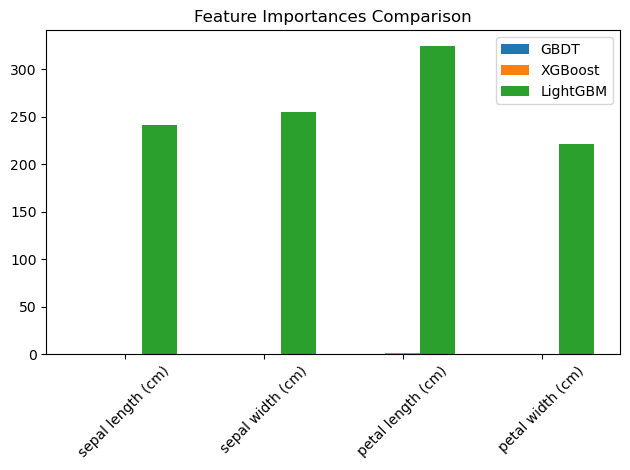

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# 加载数据
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sklearn GBDT
gbdt = GradientBoostingClassifier(random_state=42)
gbdt.fit(X_train, y_train)
acc_gbdt = accuracy_score(y_test, gbdt.predict(X_test))
feat_gbdt = gbdt.feature_importances_

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
feat_xgb = xgb_model.feature_importances_

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
acc_lgb = accuracy_score(y_test, lgb_model.predict(X_test))
feat_lgb = lgb_model.feature_importances_

# 准确率对比
print("Accuracy Comparison:")
print(f"GBDT (sklearn): {acc_gbdt:.4f}")
print(f"XGBoost       : {acc_xgb:.4f}")
print(f"LightGBM      : {acc_lgb:.4f}")

# 特征重要性对比图
x = np.arange(X.shape[1])
width = 0.25
plt.bar(x - width, feat_gbdt, width, label='GBDT')
plt.bar(x, feat_xgb, width, label='XGBoost')
plt.bar(x + width, feat_lgb, width, label='LightGBM')
plt.xticks(x, load_iris().feature_names, rotation=45)
plt.title("Feature Importances Comparison")
plt.legend()
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

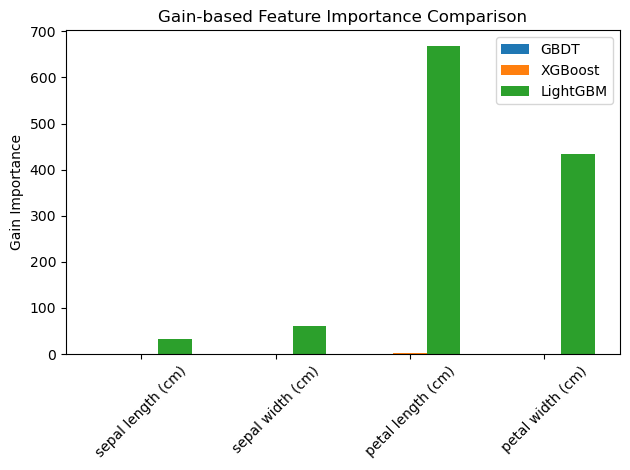

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
gbdt = GradientBoostingClassifier(random_state=42)
gbdt.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Get gain-based feature importances
feat_gbdt = gbdt.feature_importances_
feat_lgb = lgb_model.booster_.feature_importance(importance_type='gain')
feat_xgb = [xgb_model.get_booster().get_score(importance_type='gain').get(f'f{i}', 0) for i in range(X.shape[1])]

# Plot
x = np.arange(X.shape[1])
width = 0.25
plt.bar(x - width, feat_gbdt, width, label='GBDT')
plt.bar(x, feat_xgb, width, label='XGBoost')
plt.bar(x + width, feat_lgb, width, label='LightGBM')
plt.xticks(x, load_iris().feature_names, rotation=45)
plt.ylabel("Gain Importance")
plt.title("Gain-based Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()
